# Single-Band Cutouts

This notebook shows examples of how to create single-band cutouts of targets from a larger image. The user provides a catalog containing the target coordinates and the cutout sizes. Cutouts are generated using [make_cutouts()](http://mosviz.readthedocs.io/en/latest/api/mosviz.utils.cutout_tools.make_cutouts.html) routine from MOSViz. It uses [Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.utils.Cutout2D.html) from Astropy. There is also a [show_cutout_with_slit()](http://mosviz.readthedocs.io/en/latest/api/mosviz.utils.cutout_tools.show_cutout_with_slit.html) routine to overplot slit apertures on the cutouts.

## Make cutouts

In [1]:
from mosviz.utils.cutout_tools import make_cutouts

Define catalog and master image filenames, which must already exist:

In [2]:
catalogname = 'data/MOS_8458_G395H-cutouts.txt'
imagename = 'data/sim143951060215_0_0-detA1-corrected_wcs.fits'

Make cutouts of the master image based on data from the catalog for NIRCam F115W:

In [3]:
make_cutouts(catalogname, imagename, 'jwst_nircam_f115w', clobber=True)

INFO: Wrote jwst_nircam_f115w_cutouts/MOS_1_010_133_jwst_nircam_f115w_cutout.fits [mosviz.utils.cutout_tools]
INFO: Wrote jwst_nircam_f115w_cutouts/MOS_1_184_053_jwst_nircam_f115w_cutout.fits [mosviz.utils.cutout_tools]
INFO: Wrote jwst_nircam_f115w_cutouts/MOS_1_359_097_jwst_nircam_f115w_cutout.fits [mosviz.utils.cutout_tools]
INFO: Wrote jwst_nircam_f115w_cutouts/MOS_2_359_145_jwst_nircam_f115w_cutout.fits [mosviz.utils.cutout_tools]


In the real world, you would use a different master image for a different instrument/filter. Here, we only have one fake data, so for illustration purpose, we repeat the above for two other different instrument/filter combinations:

In [4]:
make_cutouts(catalogname, imagename, 'jwst_nircam_f200w', clobber=True, verbose=False)
make_cutouts(catalogname, imagename, 'hst_wfc3ir_f160w', clobber=True, verbose=False)

## Show cutouts with slit overlay

All the slit overlay examples below show a vertical slit position angle. However, user can change the angle by passing in `slit_angle=x` into the routine, where `x` is the desired position angle in degrees.

Currently, only a single rectangular aperture per cutout is supported. Circular aperture or a grid of apertures per cutout can be added as future improvement to MOSViz.

In [5]:
%matplotlib inline

from mosviz.utils.cutout_tools import show_cutout_with_slit

Show slit aperture (in red) on the NIRCam F115W cutout for object ID 'MOS_2_359_145':

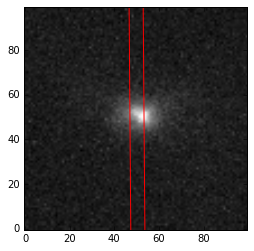

In [6]:
show_cutout_with_slit('jwst_nircam_f115w', 'MOS_1_359_097', color='red')

Now, we plot another two objects from different instruments/filters combinations, but using our own plot layout instead of the simple built-in one:

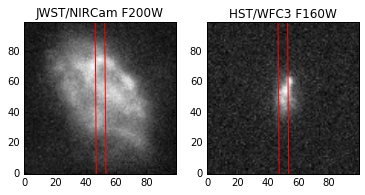

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

show_cutout_with_slit('jwst_nircam_f200w', 'MOS_1_010_133', color='red', ax=ax1)
show_cutout_with_slit('hst_wfc3ir_f160w', 'MOS_1_184_053', color='red', ax=ax2)

ax1.set_title('JWST/NIRCam F200W')
ax2.set_title('HST/WFC3 F160W')

Plot yet another object but with a different slit appearance and save it out to a PNG file:

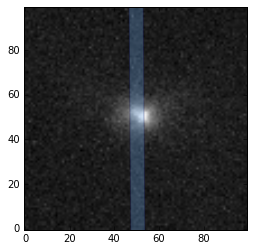

In [8]:
show_cutout_with_slit('jwst_nircam_f200w', 'MOS_1_359_097', plotname='awesome_object.png',
                      fill=True, fc='#6daaed', ec='#0a0443', alpha=0.3)